   Age   BMI  Blood_Pressure  Glucose_Level  Diabetes_Progression
0   61  25.5             124            143                 11.50
1   30  34.0             134            187                 54.69
2   72  24.7             117             79                  1.95
3   60  26.1             124            198                 83.12
4   25  22.2             132            116                 12.60
Mean Squared Error: 1015.41
R² Score: -1.79


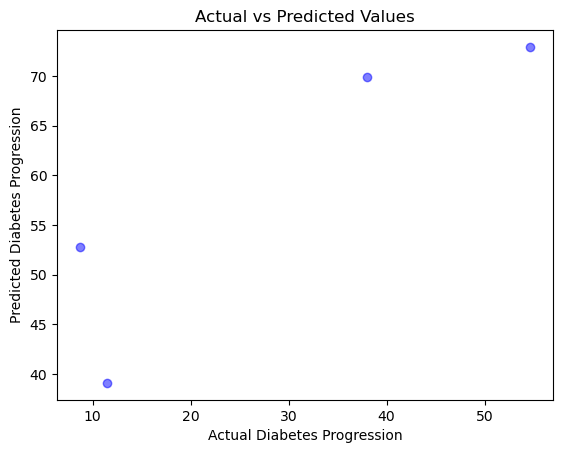

Confusion Matrix:
[[0 3]
 [0 1]]
Classification Accuracy: 25.00%


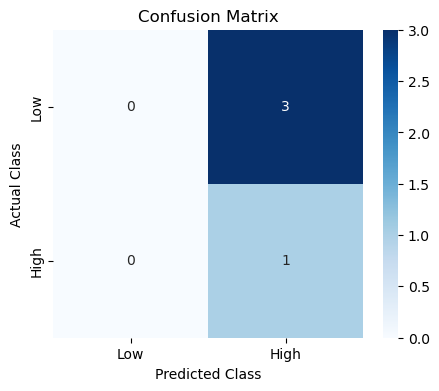

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score

# Load dataset
file_path = "disease_progression.csv"  # Update with correct file path if needed
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Features and target variable
X = df[['Age', 'BMI', 'Blood_Pressure', 'Glucose_Level']]  # Independent variables
y = df['Diabetes_Progression']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("Actual vs Predicted Values")
plt.show()

# -----------------------------
# Convert Regression to Classification for Confusion Matrix
# -----------------------------
# Define threshold (median split into Low & High progression)
threshold = np.median(y)
y_test_class = (y_test >= threshold).astype(int)  # 1 = High, 0 = Low
y_pred_class = (y_pred >= threshold).astype(int)  # Convert predictions

# Compute confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
accuracy = accuracy_score(y_test_class, y_pred_class)

print(f"Confusion Matrix:\n{cm}")
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()